# 1. Recommendation concepts
A recommender system or recommendation engine is a program that aims to suggest the most revalent *items* to each *user*. With the rise of digital services, recommender systems have taken more and more places in human's life. Some successful recommender systems are of large comapnies such as Netflix, Google and Amazon.

#### Input data
Explicit ratings, is the direct satisfaction level each an user would give to a product
- Users are account for building input data
- Missing data, since our customers are lazy
- Being biased for personal perspective
- Not stable, affected by user's feeling at current time and is not updated 

Implicit ratings, is the scores being derived from observed actions of users
- The company is account for building input data
- Require to have some sort of unsupervised formulas/rules to map an user's actions to his ratings
- Overall, better than explicit ratings

Metadata

Linkage

# 3. Content-based Filtering

http://infolab.stanford.edu/~ullman/mmds/ch9.pdf

Input data: items' metadata such as movie's genre, music genres, product brands,... especially description.

# Collaborative Filtering
Input data: the utility matrix, contains user IDs, item IDs and ratings. The approach is to use ratings of other people to infer the missing scores of an user. Then recommend highest ranking items the user have not visited.

Since the utility matrix has a lot of missing ratings, use one of these two strategies to fill them:
- Fill 0
- Fill mean value of each row/column, then subtract each row/column with the mean

#### User-user collaborative filtering
- Represent each customer as an $n$-dimensional vector of items, where $n$ is the number of distinct items. This vector is multiplied with the inverse frequency (the inverse number of people who have purchased or rated the item) in order to make less popular items more relavent.
- Calculate the similarity matrix for all pairs of users. Some similarity measures: correlation coefficient, cosine, Euclidean distance.
- Find $k$ most similar neighbors to the an user, then aggregate ratings of these neighbors as ratings for the items the user have not rated yet.

This algorithm is computationally expensive, since there are usually milions of users and items in practice. This issue can be addressed by using a clustering algorithm to devide the customer pool into many segments. Then, find the nearest segment to each user instead of iterating over the customer base to find the most similar neighbors. However, there is a trade-off between recommendation quality and scalability. When grouping an enormous number of customers into a single segment, a lot of user information has been remove, thus the recommendation becomes less relevant.

#### Item-item collaborative filtering
This method is similar to user-user approach, but it computes the similarity between items rather than users. As the number of items is usually much less than the number of users, this can reduce a lot of processing time and memory usage. There is also another improvement is that it only calculates the similarity between related items, since there are so many pairs having no common customers.

#### Siamese network

# Dữ liệu đầu vào
Explicit ratings: đánh giá trực tiếp của người dùng đối với từng sản phẩm.
- Trách nhiệm xây dựng data thuộc về người dùng
- Không đầy đủ
- Bị biased vì thang điểm mỗi người khác nhau
- Mang tính cảm tính, 1 người có thể cho nhiều rating khác nhau cho cùng 1 bộ phim, tuỳ cảm xúc

Implicit ratings
- Trách nhiệm thu thập data thuộc về PTDL
- Không xác định được "ghét", chỉ xác định được "thích"

In [1]:
import pandas as pd
import numpy as np

In [10]:
df_user = pd.read_csv('ml-100k/u.user', sep='|', names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])
df_user.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [23]:
df_rating_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')
df_rating_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'], encoding='latin-1')

df_rating_base.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [30]:
item_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

df_item = pd.read_csv('ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1').drop(columns=['IMDb URL'])
df_item.head()

,movie id,movie title,release date,video release date,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
users = df_user.values
ratings = df_rating_base.values
items = df_item.values[:, -19:]

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True, norm ='l2')

In [40]:
tfidf = transformer.fit_transform(items).toarray()

# 4. Google's PageRank

PageRank was originally invented by Google in 1998 and had became an extraordinary success as a search engine. It makes clever use of *eigenvalues* and *eigenvectors* to rank websites, thus delivers the most relevant result for the search query. The algorithm works in a *linked database*, where each node may contain some kind of *links* or *references* to other nodes. Two most familiar *linked databases* appear in real life are (1) research papers containing *citations* and (2) the world wide web, where web pages contain *links* to others.

The advantage of recommendation engines generated by PageRank is that they ensure the more backlinks a page has, the more reliable it is. They also place more influence to a link from a trustworthy page compared to links from a less reliable page.

*Reference:*
- *[Google Patents - Method for node ranking in a linked database](https://patents.google.com/patent/US6285999B1/en) (original version)*
- *[Google Patents - Producing a ranking for pages using distances in a web-link graph](https://patents.google.com/patent/US9165040B1/en) (updated version)*

#### The algorithm
Xếp hạng cho 1 website dựa trên tổng số trích dẫn, liên kết từ các page khác đến page đó. Tuy nhiên trọng số của các page là khác nhau: page càng uy tín thì càng có tiếng nói và ngược lại. Vì vậy page A dù chỉ cần được trích dẫn từ 1 page rất uy tín, nhiều khả năng sẽ có thứ hạng cao hơn so với một page B được trích dẫn từ nhiều page kém chất lượng.

$$r(A)=\frac{\alpha}{n}+(1-\alpha)\sum{\frac{r(B_i)}{|B_i|}}$$

trong đó:
- A là page cần tính rank, $r(A)$ là rank page A
- $B_i$ là một trong số các back link của page A, $|B_i|$ là số foward link của page $B$
- $\alpha$ là yếu tố damping, đại diện cho xác suất một người dùng ngẫu nhiên click vào 1 trang web thay vì đi theo foward link thông thường.
- $n$ là tổng số page trong toàn bộ web

Sau khi xây dựng mô hình xong, có thể giải hệ $n$ phương trình $n$ biến trên để tìm ra rank của từng page. Tuy nhiên cách này không khả thi khi số lượng page lên đến hàng triệu, vì vậy được thay thế bằng cách estimate xấp xỉ rank bằng kỹ thuật iterative như sau:
- Khởi tạo 1 vector $p_0$ chứa rank cho mỗi page với giá trị $1/n$
- Lập matrix A kích thước $n\times n$ trong đó phần tử ở hàng i, cột j là foward link từ page i đến page j, thể hiện dưới dạng xác suất 1 người dùng đang từ page i chuyển sang page j. Vì là xác suất nên matrix này có tổng các phẩn tử trong 1 cột bằng 1 ([stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix)). Ngoài ra matrix này luôn có dominant eigenvalue = 1.
- Sử dụng [Power interation](https://en.wikipedia.org/wiki/Power_iteration) tính xấp xỉ eigenvector. Các giá trị trong eigenvector chính là page rank.

$$p_\infty=\lim_{n\to\infty}{A^\infty p_0}$$

In [15]:
import networkx as nx
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

with open('./dataset/HITS.txt') as f:
    lines = f.readlines()

G = nx.DiGraph()

for line in lines:
    t = tuple(line.strip().split(','))
    G.add_edge(*t)

h, a = nx.hits(G, max_iter=100)
h = dict(sorted(h.items(), key=lambda x: x[0]))
a = dict(sorted(a.items(), key=lambda x: x[0]))

print(np.round(list(a.values()), 3))
print(np.round(list(h.values()), 3))

pr = nx.pagerank(G)
pr = dict(sorted(pr.items(), key=lambda x: x[0]))
print(np.round(list(pr.values()), 3))


sim = nx.simrank_similarity(G)
lol = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = np.round(array(lol), 3)
print(sim_array)

# nx.draw(G, with_labels=True, node_size=2000, edge_color='#eb4034', width=3, font_size=16, font_weight=500, arrowsize=20, alpha=0.8)

[0.088 0.187 0.369 0.128 0.059 0.11  0.    0.059]
[0.043 0.144 0.03  0.187 0.268 0.144 0.154 0.03 ]
[0.241 0.137 0.218 0.24  0.077 0.035 0.019 0.034]
[[1.    0.208 0.221 0.193 0.217 0.269 0.    0.171]
 [0.208 1.    0.355 0.369 0.302 0.553 0.    0.369]
 [0.221 0.355 1.    0.242 0.4   0.325 0.    0.427]
 [0.193 0.369 0.242 1.    0.229 0.548 0.    0.244]
 [0.217 0.302 0.4   0.229 1.    0.272 0.    0.498]
 [0.269 0.553 0.325 0.548 0.272 1.    0.    0.245]
 [0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.171 0.369 0.427 0.244 0.498 0.245 0.    1.   ]]


In [17]:
nx.__version__

'2.5'

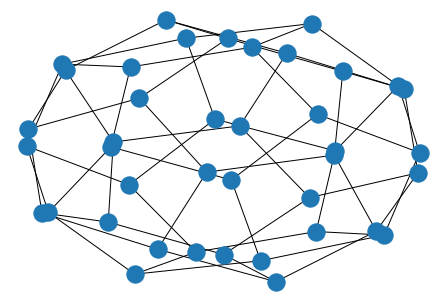

In [2]:
import networkx as nx
G = nx.dodecahedral_graph()
nx.draw(G)
nx.draw(G, pos=nx.spring_layout(G)) 

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*